In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import mean_absolute_error

from datetime import datetime, date
from sklearn.preprocessing import OneHotEncoder

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px
sns.set(rc = {'figure.figsize':(15,8)})
from sklearn.linear_model import LassoCV

#logistic regression
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

Load the data set

In [2]:
df = pd.read_csv('fraudTrain.csv')

In [3]:
df_test = pd.read_csv('fraudTest.csv')


In [3]:
df = df.reset_index()

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,01/01/2019 00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",09/03/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,01/01/2019 00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,21/06/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,01/01/2019 00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,19/01/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,01/01/2019 00:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,12/01/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,01/01/2019 00:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,28/03/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [6]:
df.shape

(1048575, 22)

In [7]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.048575e+06,1.048569e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.171565e+17,7.034535e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,5.727773e-03
std,1.308811e+18,1.739205e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,7.546503e-02
min,6.041621e+10,0.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800400e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,0.000000e+00
50%,3.520550e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,0.000000e+00
75%,4.642260e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,0.000000e+00
max,4.992350e+18,7.000000e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1048575 non-null  object 
 1   cc_num                 1048575 non-null  float64
 2   merchant               1048575 non-null  object 
 3   category               1048575 non-null  object 
 4   amt                    1048569 non-null  float64
 5   first                  1048575 non-null  object 
 6   last                   1048575 non-null  object 
 7   gender                 1048575 non-null  object 
 8   street                 1048575 non-null  object 
 9   city                   1048575 non-null  object 
 10  state                  1048575 non-null  object 
 11  zip                    1048575 non-null  int64  
 12  lat                    1048575 non-null  float64
 13  long                   1048575 non-null  float64
 14  city_pop          

In [9]:
df.nunique()

trans_date_trans_time     476595
cc_num                       943
merchant                     693
category                      14
amt                        48603
first                        348
last                         479
gender                         2
street                       965
city                         879
state                         51
zip                          952
lat                          950
long                         951
city_pop                     865
job                          493
dob                          951
trans_num                1048575
unix_time                1030650
merch_lat                1016437
merch_long               1034825
is_fraud                       2
dtype: int64

In [10]:
df.isnull().any()

trans_date_trans_time    False
cc_num                   False
merchant                 False
category                 False
amt                       True
first                    False
last                     False
gender                   False
street                   False
city                     False
state                    False
zip                      False
lat                      False
long                     False
city_pop                 False
job                      False
dob                       True
trans_num                False
unix_time                False
merch_lat                False
merch_long               False
is_fraud                 False
dtype: bool

In [11]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      6
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      1
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Selecting the best option for dealing with missing values

In [12]:
y = df.is_fraud

In [11]:
#Select numerical fields only

In [13]:
fields_to_use = df.drop(['is_fraud'], axis=1)
X = fields_to_use.select_dtypes(exclude=['object'])
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

In [14]:
X_valid.isnull().sum()

cc_num        0
amt           0
zip           0
lat           0
long          0
city_pop      0
unix_time     0
merch_lat     0
merch_long    0
dtype: int64

Define function to measure score of different approacheds

In [15]:
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = HistGradientBoostingClassifier()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

First approach, drop column with missing values

In [16]:
#Get columns with missing value
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

print("MAE from Approach 1 (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop columns with missing values):
0.006675726581312734


Simple imputation using mean

In [17]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

print("MAE from Approach 2 (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE from Approach 2 (Imputation):
0.005936628281238824


Impute missing values but keeping track of the missing values

In [18]:
# Make copy to avoid changing original data (when imputing)
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

print("MAE from Approach 3 (An Extension to Imputation):")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid))

MAE from Approach 3 (An Extension to Imputation):
0.006017690675440479


After checking the above three approaches, the second option performed slightly better than the other two though the difference is very low

In [19]:
imputed_X_valid_plus.isnull().any()

cc_num             False
amt                False
zip                False
lat                False
long               False
city_pop           False
unix_time          False
merch_lat          False
merch_long         False
amt_was_missing    False
dtype: bool

Use the original data to fill the missing values and start the EDA

In [20]:
mean = df['amt'].mean()

In [21]:
df['amt'].fillna(value=mean, inplace=True)

The categorical Missing value under age which is a single missing value will be filled by the most occuring value in that column

In [22]:
df_cleaned = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [23]:
df_cleaned.nunique()

trans_date_trans_time     476595
cc_num                       943
merchant                     693
category                      14
amt                        48604
first                        348
last                         479
gender                         2
street                       965
city                         879
state                         51
zip                          952
lat                          950
long                         951
city_pop                     865
job                          493
dob                          951
trans_num                1048575
unix_time                1030650
merch_lat                1016437
merch_long               1034825
is_fraud                       2
dtype: int64

After filling all the missing values, we can start doing the analysis of the data

In [24]:
df_cleaned['amt'].describe()

count    1.048575e+06
mean     7.034535e+01
std      1.739200e+02
min      0.000000e+00
25%      9.640000e+00
50%      4.745000e+01
75%      8.305000e+01
max      7.000000e+04
Name: amt, dtype: float64

In [25]:
np.percentile(df_cleaned['amt'],99)

544.9026000000001

In [26]:
df_cleaned['amt'].max()

70000.0

## Amount vs Fraud
On checking the amount of transaction data, we can see there is a few outlier as 99% of the data falls below 544.90, hence as we try to plot the distribution its important to keep that in mind

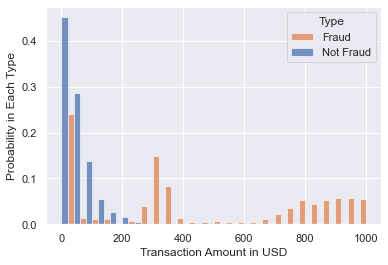

In [27]:
#Plotting amount against fraud
ax=sns.histplot(x='amt',data=df_cleaned[df_cleaned.amt<=1000],hue='is_fraud',stat='probability',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Probability in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In the above graph, we can see that normal transactions tend to be upto 200 dollars but fraudulent transactions are above 300 dollars

## Amount vs gender
We check to see if gender affects occurence of fraudulent transactions

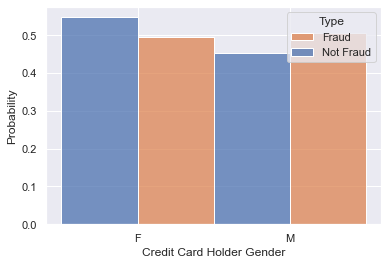

In [28]:
#Gender vs Fraud
ax=sns.histplot(x='gender',data=df_cleaned, hue='is_fraud',stat='probability',multiple='dodge',common_norm=False)
ax.set_ylabel('Probability')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

We can see from the above that gender has a very low impact on the occurence of fraud as its almost 50% for each gender

## Spendind vs Fraud
The next step we check to see how categories of spending affect fraud and which are more susceptible.

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

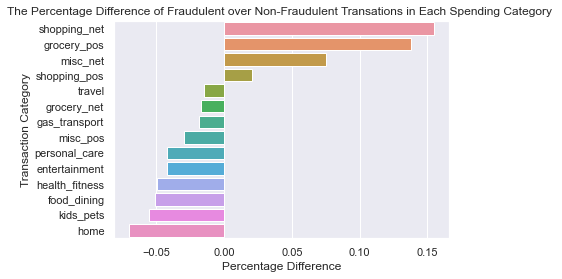

In [29]:
#calculate the percentage difference
a=df_cleaned[df_cleaned['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=df_cleaned[df_cleaned['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

From the above we can see that there are more fraudulent transactions in categories like shopping_ net, grocery_pos, misc_net as compared to areas like home, kids_pets and food_dining. It is also good to note the difference is very minimal.

## Age vs Fraud
We check to see how age affects chances of fraud happening

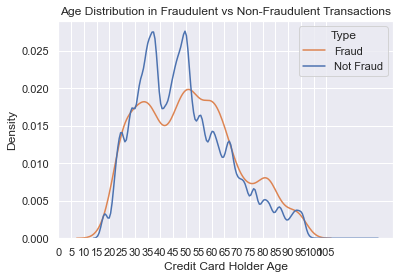

In [30]:

import datetime as dt
df_cleaned['age']=dt.date.today().year-pd.to_datetime(df_cleaned['dob']).dt.year
ax=sns.kdeplot(x='age',data=df_cleaned, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

There is a high level of normal transactions on those aged between 30 to 40 years and 45 to 53 but the fraud transactions are around 35 years of age 50 to 65 years but the curve is generally smooth as compared to normal transactions

# Fraud by time of the day, week and month
This will help to understand which times of the day, weeek or month fraud occurs the most

Time of the day

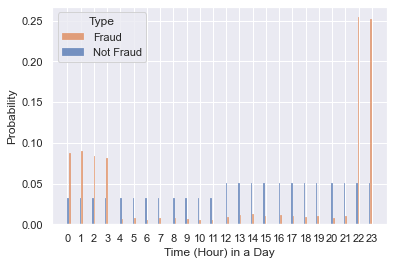

In [31]:
df_cleaned['hour']=pd.to_datetime(df_cleaned['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=df_cleaned, x="hour", hue="is_fraud", common_norm=False,stat='probability',multiple='dodge')
ax.set_ylabel('Probability')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

From the above histogram, it shows normal transactions are evenly distributed throughout the day but fraud peaks from around 10pm to around 3am in the morning. 

Weekly Trend


<ipython-input-32-30ce05621679>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


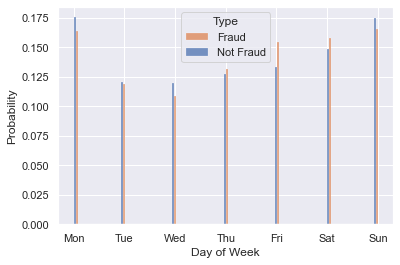

In [32]:

df_cleaned['day']=pd.to_datetime(df_cleaned['trans_date_trans_time']).dt.dayofweek
ax=sns.histplot(data=df_cleaned, x="day", hue="is_fraud", common_norm=False,stat='probability',multiple='dodge')
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Probability')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Peak normal transactions occur on monday but there is high fraudulent transactions between thurday, friday and saturday

Monthly Trend

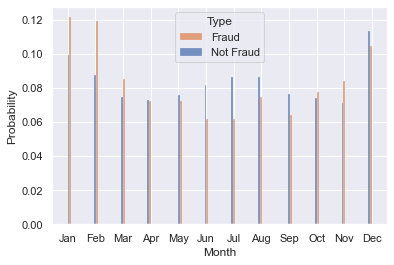

In [33]:
#month vs fraud
df_cleaned['month']=pd.to_datetime(df_cleaned['trans_date_trans_time']).dt.month
ax=sns.histplot(data=df_cleaned, x="month", hue="is_fraud", common_norm=False,stat='probability',multiple='dodge')
ax.set_ylabel('Probability')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

State vs Fraud

Text(0.5, 1.0, 'The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

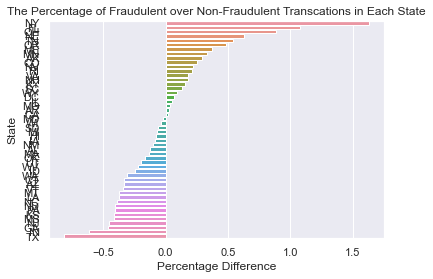

In [34]:
a=df_cleaned['state'][df_cleaned.is_fraud==0].value_counts(normalize=True)
a=a.to_frame()
a=a.reset_index()
a.columns = ['State', 'Per']

b=df_cleaned['state'][df_cleaned.is_fraud==1].value_counts(normalize=True)
b=b.to_frame()
b=b.reset_index()
b.columns = ['State', 'Per']
merged=a.merge(b,on='State')
merged['diff']=merged['Per_y']-merged['Per_x']
merged['diff']=merged['diff']*100
merged=merged.sort_values('diff',ascending=False)

ax1=sns.barplot(data=merged, x='diff',y='State')
ax1.set_xlabel('Percentage Difference')
ax1.set_ylabel('State')
plt.title('The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

We can observe that some states like New york and florida have most cases of fraud with states like Texas and indiana having the least cases.

In [35]:
df_cleaned.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,hour,day,month
0,01/01/2019 00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,09/03/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,34,0,1,1
1,01/01/2019 00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,21/06/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,44,0,1,1
2,01/01/2019 00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,19/01/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,60,0,1,1
3,01/01/2019 00:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,12/01/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,55,0,1,1
4,01/01/2019 00:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,28/03/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,36,0,1,1


Check columns with Low cardinality, that is columns with less unique values, we will check columns less than 10 unique values

## Model and Training
We start checking the models to see which will perform well.

## The next step is feature selection and clustering

In [36]:
#Initial selection of features avoiding those with high cardinality



train=df_cleaned[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud','gender']]
#train=pd.get_dummies(train, drop_first=True)


In [37]:
train.head()

,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,day,month,is_fraud,gender
0,misc_net,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,34,0,1,1,0,F
1,grocery_pos,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,44,0,1,1,0,F
2,entertainment,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,60,0,1,1,0,M
3,gas_transport,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,55,0,1,1,0,M
4,misc_pos,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,36,0,1,1,0,M


In [38]:
# Get list of categorical variables
s = (train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['category', 'gender']


In [39]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train[object_cols]))

OH_cols_train.index = train.index
num_X_train = train.drop(object_cols, axis=1)

OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)

In [40]:
OH_X_train.tail()

,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,day,...,6,7,8,9,10,11,12,13,14,15
1048570,77.00,21405,39.0305,-76.5515,92106,38.779464,-76.317042,79,16,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1048571,116.94,52563,41.1826,-92.3097,1583,41.400318,-92.726724,23,16,5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1048572,21.27,40202,38.2507,-85.7476,736284,37.293339,-84.798122,70,16,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1048573,9.52,11796,40.7320,-73.1000,4056,39.773077,-72.213209,32,16,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1048574,6.81,30009,34.0770,-84.3033,165556,33.601468,-83.891921,25,16,5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
with pd.option_context("display.max_columns", None):
    display(OH_X_train)

,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,day,month,is_fraud,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,34,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,44,0,1,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,60,0,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,55,0,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,36,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,77.00,21405,39.0305,-76.5515,92106,38.779464,-76.317042,79,16,5,10,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1048571,116.94,52563,41.1826,-92.3097,1583,41.400318,-92.726724,23,16,5,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1048572,21.27,40202,38.2507,-85.7476,736284,37.293339,-84.798122,70,16,5,10,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1048573,9.52,11796,40.7320,-73.1000,4056,39.773077,-72.213209,32,16,5,10,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Clustering the data

Embedded FS method (Lasso regularization) to select features based on importance

In [43]:
X = OH_X_train.drop(['is_fraud'], axis=1)
#X = OH_X_train
y = OH_X_train['is_fraud']
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) +
      " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
#coef
reg.coef_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Best alpha using built-in LassoCV: 0.089666
Best score using built-in LassoCV: 0.040298
Lasso picked 3 variables and eliminated the other 24 variables


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([ 8.41830937e-05, -5.83270063e-09,  0.00000000e+00,  0.00000000e+00,
        2.11880330e-10,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00])

In [44]:
reg.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LassoCV()

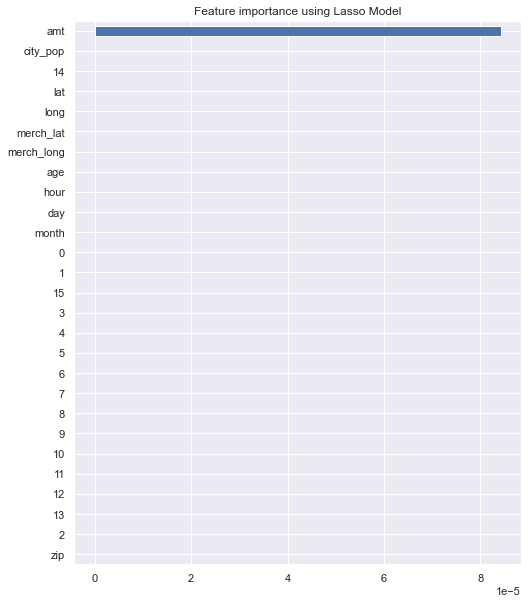

In [45]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()

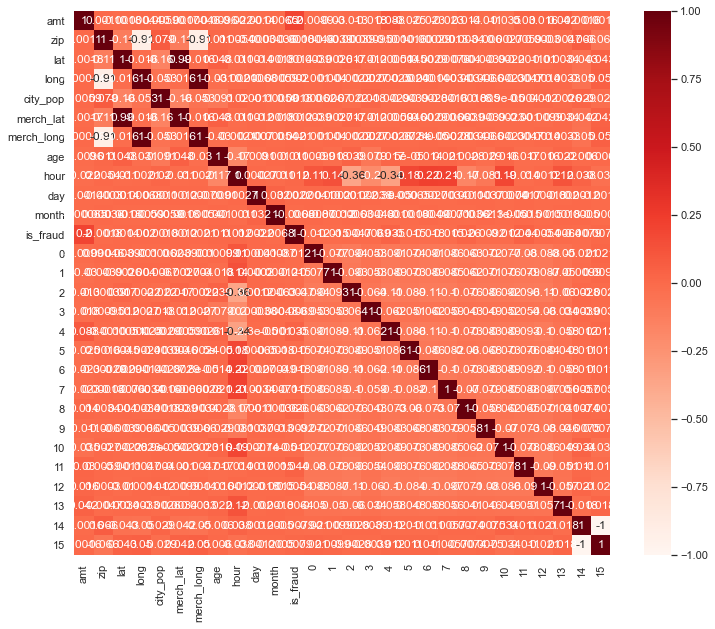

In [46]:
# Using Pearson Correlation of all features (including target)
plt.figure(figsize=(12,10))                      # creating a plot figure
#cor = df.corr()                                 # compute correlation
cor = OH_X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)   # plot heatmap
plt.show()   

In [49]:
#Correlation with output variable
cor_target = abs(cor["is_fraud"])
#cor_target = abs(cor["Rent"])


#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

is_fraud    1.0
Name: is_fraud, dtype: float64

## pandas dummy to convert the select categorical data with lower cardinality

In [50]:
train_d=pd.get_dummies(train, drop_first=True)

In [51]:
train_d.head()

,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,day,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,34,0,1,...,0,0,0,1,0,0,0,0,0,0
1,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,44,0,1,...,0,0,0,0,0,0,0,0,0,0
2,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,60,0,1,...,0,0,0,0,0,0,0,0,0,1
3,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,55,0,1,...,0,0,0,0,0,0,0,0,0,1
4,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,36,0,1,...,0,0,0,0,1,0,0,0,0,1


In [62]:
y_train=train_d['is_fraud'].values
X_train=train_d.drop("is_fraud", axis='columns').values

In [52]:
X = train_d.drop(['is_fraud'], axis=1)
#X = OH_X_train
y = train_d['is_fraud']
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) +
      " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
#coef
reg.coef_

Best alpha using built-in LassoCV: 0.089666
Best score using built-in LassoCV: 0.040298
Lasso picked 3 variables and eliminated the other 22 variables


array([ 8.41830937e-05, -5.83270063e-09,  0.00000000e+00,  0.00000000e+00,
        2.11880330e-10,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00])

In [53]:
reg.fit(X,y)

LassoCV()

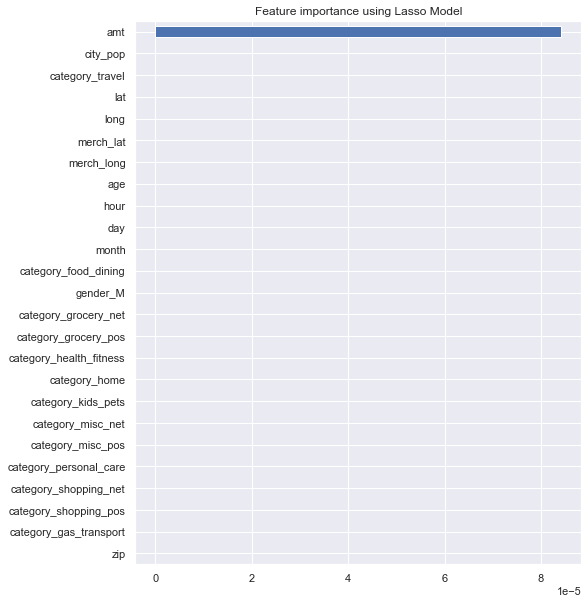

In [54]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()

The data has very low correlation with the algorithm only selecting three features with importance with amount being the best feature

## Run the same steps on the test data

In [56]:
#let's do the same to the testing dataset
df_test['age']=dt.date.today().year-pd.to_datetime(df_test['dob']).dt.year
df_test['hour']=pd.to_datetime(df_test['trans_date_trans_time']).dt.hour
df_test['day']=pd.to_datetime(df_test['trans_date_trans_time']).dt.dayofweek
df_test['month']=pd.to_datetime(df_test['trans_date_trans_time']).dt.month
df_test=df_test[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud','gender']]


KeyError: 'dob'

In [66]:
df_test.isnull().sum()

amt                        5
zip                        0
lat                        0
long                       0
city_pop                   0
merch_lat                  0
merch_long                 1
age                        4
hour                       0
day                        0
month                      0
is_fraud                   0
category_food_dining       0
category_gas_transport     0
category_grocery_net       0
category_grocery_pos       0
category_health_fitness    0
category_home              0
category_kids_pets         0
category_misc_net          0
category_misc_pos          0
category_personal_care     0
category_shopping_net      0
category_shopping_pos      0
category_travel            0
gender_M                   0
dtype: int64

In [67]:
df_test['amt'].fillna(value=mean, inplace=True)

In [68]:
merch_mean=df_test['merch_long'].mean()
df_test['merch_long'].fillna(value=merch_mean, inplace=True)

In [69]:
df_testc = df_test.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [70]:
df_testc.isnull().sum()

amt                        0
zip                        0
lat                        0
long                       0
city_pop                   0
merch_lat                  0
merch_long                 0
age                        0
hour                       0
day                        0
month                      0
is_fraud                   0
category_food_dining       0
category_gas_transport     0
category_grocery_net       0
category_grocery_pos       0
category_health_fitness    0
category_home              0
category_kids_pets         0
category_misc_net          0
category_misc_pos          0
category_personal_care     0
category_shopping_net      0
category_shopping_pos      0
category_travel            0
gender_M                   0
dtype: int64

In [71]:
#convert category to dummy variables
#df_testc=pd.get_dummies(df_testc, drop_first=True)
y_test=df_testc['is_fraud'].values
X_test=df_testc.drop("is_fraud", axis='columns').values

In [72]:
df_test.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

We have a very imbalanced data set as there are few fraud cases as compared to genuine transactions and hence to counter this imbalance, it's important to use the SMOTE (Synthetic Minority Oversampling Technique) method to resample the training dataset so that the model can be trained on more balanced data for better results.

In [73]:
method= SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)
model=LogisticRegression()
model.fit(X_resampled,y_resampled)
predicted=model.predict(X_test)
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.05      0.75      0.10      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.85      0.54    555719
weighted avg       1.00      0.95      0.97    555719

Confusion matrix:
 [[524608  28966]
 [   534   1611]]
Share of Non-Fraud in Test Data: 0.9961


To evaluate fraud detection models, the concepts of sensitivty/recall and precision are very important. Recall is True Positives/(True Positives + False Negatives), which meaures how many fraud cases fly under the radar while precision (True Positives/(True Positives + False Positives)) evaluates how good the model is at generating as fewer false alarms as possible. For fraud detection, we want to prioritize high recall to leave out as few fraud cases as possible while also having a relatively high precision because too many false alarms can also be a problem!

In the Logistic Regression model above, the recall is around 0.75 and the general accuracy of the model is around 0.95, which is lower than the actual share of non-fraud cases in the testing dataset. Both metrics seem to suggest that the model does not add very much to detecting fraud. Moreover, the Precision of the model is only 0.05: too many false positives to be actually useful!

In [78]:
#random forest 
#from sklearn.ensemble import RandomForestClassifier
#model2 = RandomForestClassifier(random_state=5)
#model2.fit(X_resampled,y_resampled)
#predicted=model2.predict(X_test)
#print('Classification report:\n', classification_report(y_test, predicted))
#conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
#print('Confusion matrix:\n', conf_mat)
#print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Scale the data using the standard scaler.

In [82]:
scaler = StandardScaler()
scaler.fit(train_d)
train_cc=pd.DataFrame(scaler.transform(train_d),index=train_d.index,columns=train_d.columns)

In [83]:
train_cc.head()

,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,day,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,-0.375893,-0.749036,-0.483482,0.657638,-0.282913,-0.493457,0.593872,-0.850651,-1.877811,-0.977715,...,-0.266147,-0.323929,-0.309021,4.418969,-0.255998,-0.274548,-0.285248,-0.314451,-0.179781,-0.909334
1,0.212078,1.872197,2.039539,-2.033949,-0.293977,2.078870,-2.030364,-0.274761,-1.877811,-0.977715,...,-0.266147,-0.323929,-0.309021,-0.226297,-0.255998,-0.274548,-0.285248,-0.314451,-0.179781,-0.909334
2,0.861113,1.280778,0.718445,-1.601601,-0.280734,0.903352,-1.592341,0.646664,-1.877811,-0.977715,...,-0.266147,-0.323929,-0.309021,-0.226297,-0.255998,-0.274548,-0.285248,-0.314451,-0.179781,1.099706
3,-0.145730,0.402647,1.516144,-1.590829,-0.288058,1.663175,-1.621866,0.358719,-1.877811,-0.977715,...,-0.266147,-0.323929,-0.309021,-0.226297,-0.255998,-0.274548,-0.285248,-0.314451,-0.179781,1.099706
4,-0.163209,-0.905962,-0.022192,0.782302,-0.294142,0.027691,0.841920,-0.735473,-1.877811,-0.977715,...,-0.266147,-0.323929,-0.309021,-0.226297,3.906276,-0.274548,-0.285248,-0.314451,-0.179781,1.099706
